# SWMAL Exercise

## Pipelines

### Qa) Create a Min/max scaler for the MLP

In [1]:
%matplotlib inline

import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def LoadDataFromL01():
    filename = "Data/itmal_l01_data.pkl"
    with open(f"{filename}", "rb") as f:
        (X, y) = pickle.load(f)
        return X, y

X, y = LoadDataFromL01()

print(f"X.shape={X.shape},  y.shape={y.shape}")

assert X.shape[0] == y.shape[0]
assert X.ndim == 2
assert y.ndim == 1  # did a y.ravel() before saving to picke file
assert X.shape[0] == 29

# re-create plot data (not stored in the Pickel file)
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

print("OK")

X.shape=(29, 1),  y.shape=(29,)
OK


The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..

lin.reg.score(X, y)=0.73
    MLP.score(X, y)=-241276.37

OK


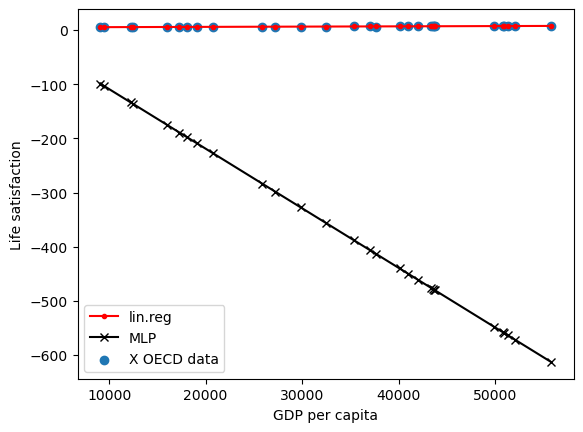

In [2]:
def isNumpyData(t: np.ndarray, expected_ndim: int):
    assert isinstance(expected_ndim, int), f"input parameter 'expected_ndim' is not an integer but a '{type(expected_ndim)}'"
    assert expected_ndim>=0, f"expected input parameter 'expected_ndim' to be >=0, got {expected_ndim}"
    if t is None:
        print("input parameter 't' is None", file=sys.stderr)
        return False
    if not isinstance(t, np.ndarray):
        print("excepted numpy.ndarray got type '{type(t)}'", file=sys.stderr)
        return False
    if not t.ndim==expected_ndim:
        print("expected ndim={expected_ndim} but found {t.ndim}", file=sys.stderr)
        return False
    return True

def PlotModels(model1, model2, X: np.ndarray, y: np.ndarray, name_model1: str, name_model2: str):
    
    # NOTE: local function is such a nifty feature of Python!
    def CalcPredAndScore(model, X: np.ndarray, y: np.ndarray,):
        assert isNumpyData(X, 2) and isNumpyData(y, 1) and X.shape[0]==y.shape[0]
        y_pred_model = model.predict(X)
        score_model = r2_score(y, y_pred_model) # call r2
        return y_pred_model, score_model    

    assert isinstance(name_model1, str) and isinstance(name_model2, str)

    y_pred_model1, score_model1 = CalcPredAndScore(model1, X, y)
    y_pred_model2, score_model2 = CalcPredAndScore(model2, X, y)

    plt.plot(X, y_pred_model1, "r.-")
    plt.plot(X, y_pred_model2, "kx-")
    plt.scatter(X, y)
    plt.xlabel("GDP per capita")
    plt.ylabel("Life satisfaction")
    plt.legend([name_model1, name_model2, "X OECD data"])

    l = max(len(name_model1), len(name_model2))
    
    print(f"{(name_model1).rjust(l)}.score(X, y)={score_model1:0.2f}")
    print(f"{(name_model2).rjust(l)}.score(X, y)={score_model2:0.2f}")

# lets make a linear and MLP regressor and redo the plots
mlp = MLPRegressor(hidden_layer_sizes=(10, ),
                   solver='adam',
                   activation='relu',
                   tol=1E-5,
                   max_iter=100000,
                   verbose=False)
linreg = LinearRegression()

mlp.fit(X, y)
linreg.fit(X, y)

print("The MLP may mis-fit the data, seen in the, sometimes, bad R^2 score..\n")
PlotModels(linreg, mlp, X, y, "lin.reg", "MLP")
print("\nOK")

lin.reg.score(X, y)=-3.95
    MLP.score(X, y)=0.73


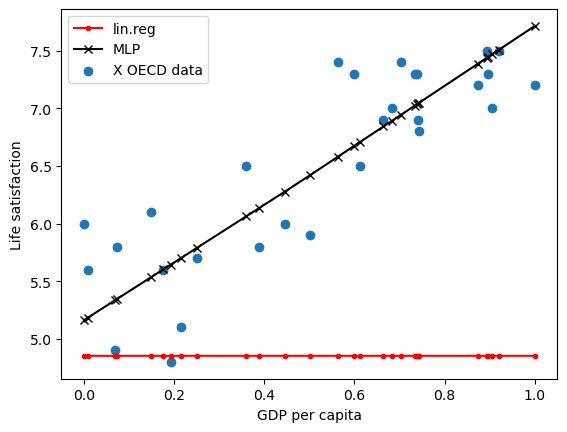

In [15]:
# Define the manual scaling function
def manual_scale(X):
    min_val = X.min()
    max_val = X.max()
    scaled_X = (X - min_val) / (max_val - min_val)
    return scaled_X

# Manually scale the input data X
X_scaled_manual = manual_scale(X)

# Retrain the MLP model with the scaled data
mlp.fit(X_scaled_manual, y)

# Replot and find the new score
PlotModels(linreg, mlp, X_scaled_manual, y, "lin.reg", "MLP")



### Qb) Scikit-learn Pipelines

R^2 score: 0.9999014590438636


C:\Users\Bruger\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


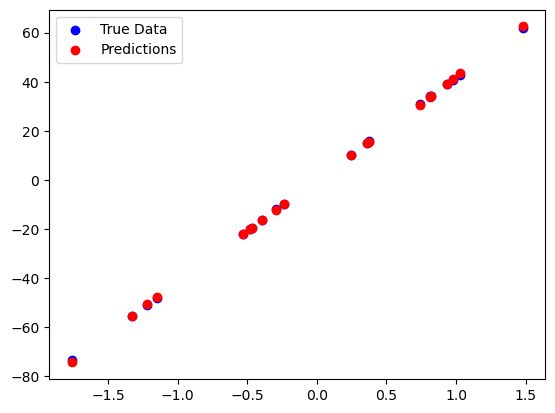

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Hyperparameters to experiment with
hidden_layer_sizes = (5, )  # Adjust the number of neurons in the hidden layer
activation_function = 'tanh'  # Try different activation functions like 'tanh', 'sigmoid', 'relu', etc.
solver = 'sgd'  # Try different solvers like 'adam', 'sgd', 'lbfgs'

mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation_function, solver=solver, max_iter=500, random_state=42)

# Normalize or scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = mlp.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print(f"R^2 score: {r2}")

# Plot the predictions if needed
plt.scatter(X_test, y_test, label="True Data", color="blue")
plt.scatter(X_test, y_pred, label="Predictions", color="red")
plt.legend()
plt.show()


### Qc) Outliers and the Min-max Scaler vs. the Standard Scaler

In [ ]:
# Min-Max-skaleringsmetoden bruges normalt til at tilpasse data til intervallet [0, 1], men den kan have udfordringer
# med "outliers," som er observationer, der ligger betydeligt væk fra den gennemsnitlige dataværdi. Dette kan føre til,
# at de fleste datapunkter er tæt på 0 eller 1, hvilket kan medføre tab af detaljer.

# StandardScaler er en alternativ tilgang, der i stedet fokuserer på dataets gennemsnit og spredning (standardafvigelse).
# Den tilpasser data ved at bruge både gennemsnittet og standardafvigelsen, hvilket gør den mere robust over for outliers,
# da den ikke forsøger at presse dem ind i et bestemt interval. Dette bevarer forholdet mellem datapunkter og mindsker den
# overdrevne indflydelse af outliers under skaleringsprocessen. StandardScaler er derfor en bedre løsning, især når der er
# abnormale værdier eller outliers i datasættet.

### Qd) Modify the MLP Hyperparameters

R^2 score: 0.9712057498625581


C:\Users\Bruger\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


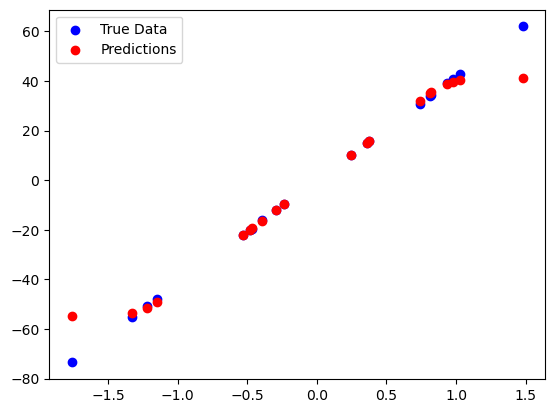

In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Hyperparameters to experiment with
hidden_layer_sizes = (5, )  # Adjust the number of neurons in the hidden layer
activation_function = 'tanh'  # Try different activation functions like 'tanh', 'sigmoid', 'relu', etc.
solver = 'adam'  # Try different solvers like 'adam', 'sgd', 'lbfgs'

mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation_function, solver=solver, max_iter=10000, random_state=42)

# Normalize or scale the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = mlp.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print(f"R^2 score: {r2}")

# Plot the predictions if needed
plt.scatter(X_test, y_test, label="True Data", color="blue")
plt.scatter(X_test, y_pred, label="Predictions", color="red")
plt.legend()
plt.show()
